# Problem Statement


Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

They first identify a set of employees based on recommendations/ past performance
Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion
For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle


In [50]:
# Importing of Libarary

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
# Reading the train and test files


test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

print ('The Shape of Train =' , train.shape)
print ('The Shape of Test =' , test.shape)

The Shape of Train = (54808, 14)
The Shape of Test = (23490, 13)


Data Analysis

In [52]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [53]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [54]:
# Statistical Representation of the train 



train.describe(include = 'all')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808,54808,52399,54808,54808,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16840,12343,36669,38496,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39195.830627,NaN,NaN,NaN,NaN,NaN,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,NaN,NaN,NaN,NaN,NaN,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000


In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [56]:
# Checking for null values

train.isnull().any()

employee_id             False
department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
dtype: bool

In [57]:
# The number of null values

train.isnull().sum()


employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

# Exploratory Data Analysis

# Univariate Analysis

In [58]:
# Checking for the number of employees Promoted

train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

We see that 0 means that emplyees that were not promoted 
and 1 means the employees that were 

In [59]:
# The age of People Promoted

promoted = (4668/54808)*100
print("Percentage of Promoted Employees is {:.2f}%".format(promoted))

Percentage of Promoted Employees is 8.52%


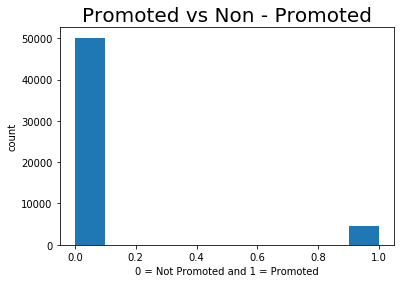

In [60]:
#Scatterplot representation of the promoted employees

plt.hist(train['is_promoted'])
plt.title('Promoted vs Non - Promoted', fontsize = 20)
plt.xlabel('0 = Not Promoted and 1 = Promoted', fontsize = 10)
plt.ylabel('count')
plt.show()

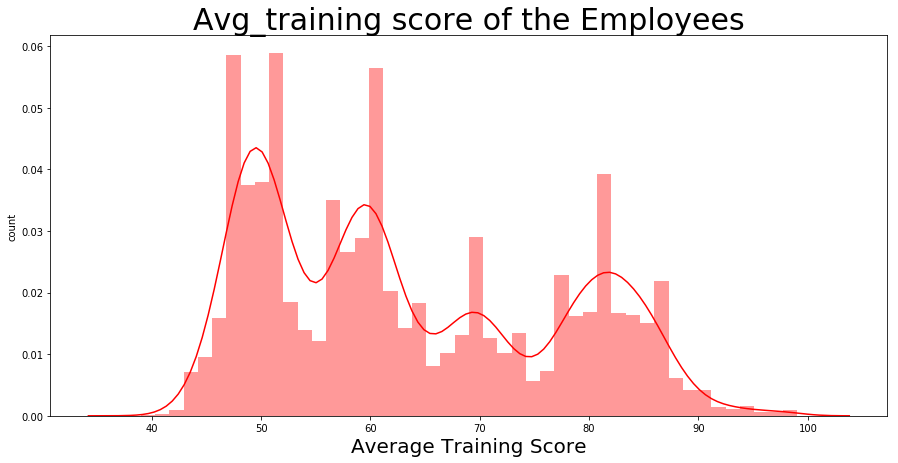

In [61]:
# Distplot representation of the avg_training score of the Employees

plt.figure(figsize=(15,7))
sns.distplot(train['avg_training_score'], color = 'Red')
plt.title('Avg_training score of the Employees', fontsize = 30)
plt.xlabel('Average Training Score', fontsize = 20)
plt.ylabel('count')
plt.show()

In [62]:
# Value count of awards won

train['awards_won?'].value_counts()

0    53538
1     1270
Name: awards_won?, dtype: int64

In [63]:
# Bivaritate analysis

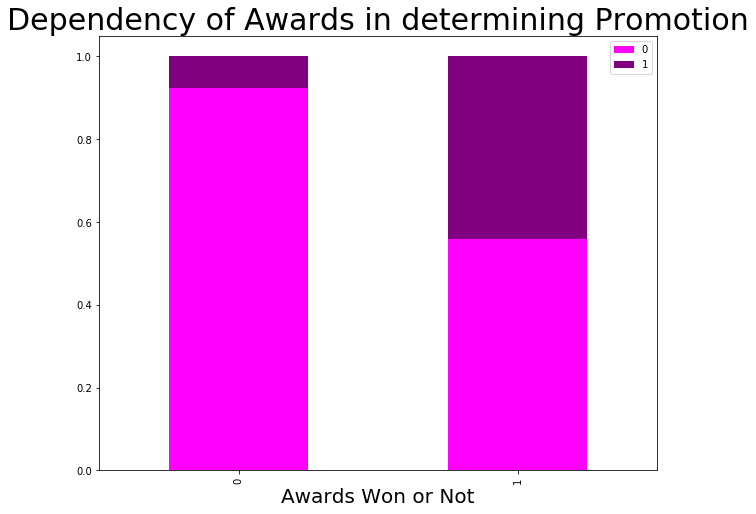

In [64]:
# dependency of awards won on promotion

data = pd.crosstab(train['awards_won?'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 8), color = ['magenta', 'purple'])

plt.title('Dependency of Awards in determining Promotion', fontsize = 30)
plt.xlabel('Awards Won or Not', fontsize = 20)
plt.legend()
plt.show()

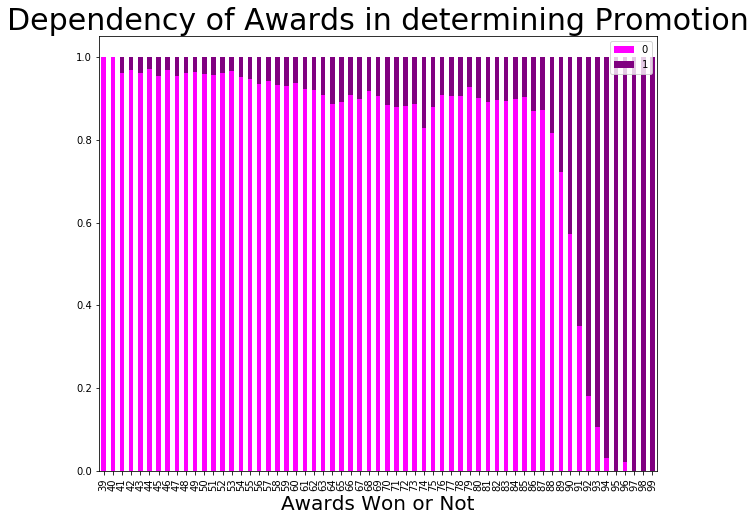

In [65]:
# dependency of awards won on promotion

data = pd.crosstab(train['avg_training_score'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 8), color = ['magenta', 'purple'])

plt.title('Dependency of Awards in determining Promotion', fontsize = 30)
plt.xlabel('Awards Won or Not', fontsize = 20)
plt.legend()
plt.show()

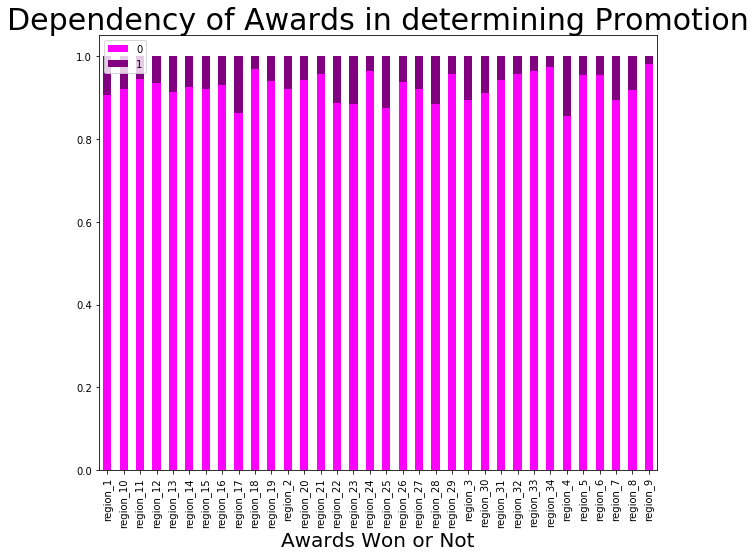

In [66]:
# dependency of awards won on promotion

data = pd.crosstab(train['region'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 8), color = ['magenta', 'purple'])

plt.title('Dependency of Awards in determining Promotion', fontsize = 30)
plt.xlabel('Awards Won or Not', fontsize = 20)
plt.legend()
plt.show()

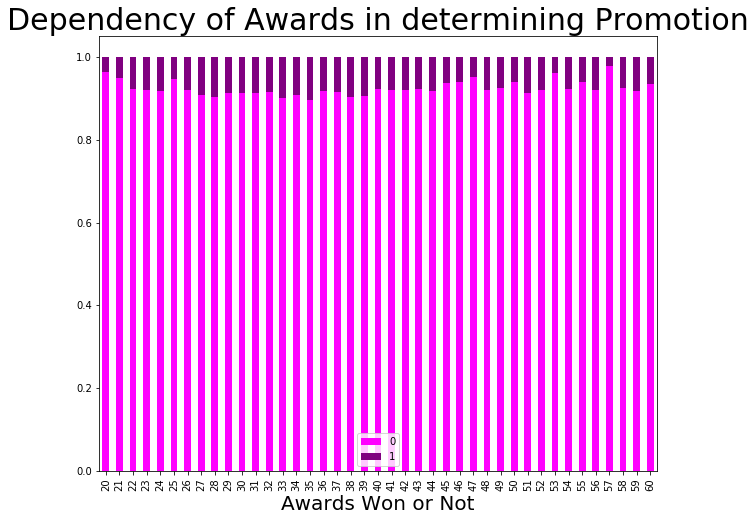

In [67]:
# dependency of awards won on promotion

data = pd.crosstab(train['age'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 8), color = ['magenta', 'purple'])

plt.title('Dependency of Awards in determining Promotion', fontsize = 30)
plt.xlabel('Awards Won or Not', fontsize = 20)
plt.legend()
plt.show()

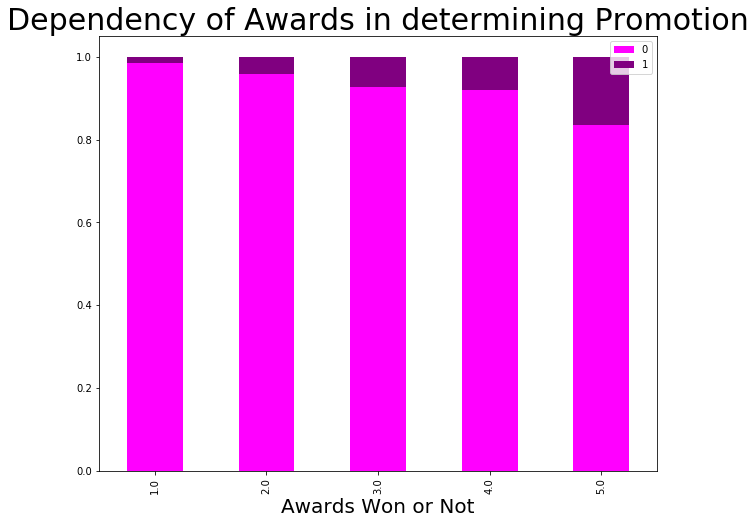

In [68]:
# dependency of awards won on promotion

data = pd.crosstab(train['previous_year_rating'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 8), color = ['magenta', 'purple'])

plt.title('Dependency of Awards in determining Promotion', fontsize = 30)
plt.xlabel('Awards Won or Not', fontsize = 20)
plt.legend()
plt.show()

# Data Preprocessing

In [70]:
# Filling Missing values

train['education'].fillna(train['education'].mode()[0], inplace = True)
train['previous_year_rating'].fillna(1, inplace = True)


print ('The number os missing values after filling =',train.isnull().sum().sum())

test['education'].fillna(test['education'].mode()[0], inplace = True)
test['previous_year_rating'].fillna(1, inplace = True)


print ('The number os missing values after filling =',test.isnull().sum().sum())

The number os missing values after filling = 0
The number os missing values after filling = 0


In [71]:
# Removing the id column

train = train.drop(['employee_id'], axis = 1)



In [72]:
# saving the employee_id

emp_id = test['employee_id']

# removing the employee_id column

test = test.drop(['employee_id'], axis = 1)



In [73]:
# Defining main splits

# we now apply one hot encoding on the test 

test = pd.get_dummies(test)



In [74]:
# Splitting the train set into dependent and independent sets

x = train.drop ('is_promoted' , axis = 1 )
Y = train['is_promoted']

print("Shape of x:", x.shape)
print("Shape of Y:", Y.shape)

Shape of x: (54808, 12)
Shape of Y: (54808,)


In [75]:
# Encoding for the train now

x = pd.get_dummies(x)

In [76]:
# splitting x and y into train and validation sets

from sklearn.model_selection import train_test_split

x_train, x_valid, Y_train, Y_valid = train_test_split(x,Y, test_size = 0.2, random_state = 0)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_valid.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of Y_valid: ", Y_valid.shape)

Shape of x_train:  (43846, 58)
Shape of x_valid:  (10962, 58)
Shape of Y_train:  (43846,)
Shape of Y_valid:  (10962,)


In [77]:
# standard scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.transform(test)
x_valid = sc.transform(x_valid)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [78]:
# Modelling

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

rf = RandomForestClassifier()
rf.fit(x_train, Y_train)

rf_pred = rf.predict(x_test)

print("Training Accuracy :", rf.score(x_train, Y_train))


print("Validation Accuracy :", rf.score(x_valid, Y_valid))



/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training Accuracy : 0.9892578570451125
Validation Accuracy : 0.9295748950921364


 XG Boost

In [87]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix


xgb = XGBClassifier()
xgb.fit(x_train, Y_train)

xgb_pred = xgb.predict(x_test)

print("Training Accuracy :", xgb.score(x_train, Y_train))

print("Validation Accuracy :", xgb.score(x_valid, Y_valid))



Training Accuracy : 0.9373260958810382
Validation Accuracy : 0.9386060937785076


In [91]:
# Using Catboost

!pip install catboost

    100% |████████████████████████████████| 9.8MB 676kB/s ta 0:00:011
    100% |████████████████████████████████| 7.2MB 898kB/s ta 0:00:011
  Stored in directory: /Users/nischaybansal/Library/Caches/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [93]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(learning_rate = 0.004, early_stopping_rounds = 100)
cbc.fit(x_train, Y_train)

cbc_pred = cbc.predict(x_test)

print("Training Accuracy :", cbc.score(x_train, Y_train))

print("Validation Accuracy :", cbc.score(x_valid, Y_valid))



0:	learn: 0.6882634	total: 16.5ms	remaining: 16.5s
1:	learn: 0.6832750	total: 31.1ms	remaining: 15.5s
2:	learn: 0.6778837	total: 45.8ms	remaining: 15.2s
3:	learn: 0.6731586	total: 60.4ms	remaining: 15s
4:	learn: 0.6676747	total: 75.4ms	remaining: 15s
5:	learn: 0.6627450	total: 90ms	remaining: 14.9s
6:	learn: 0.6577767	total: 105ms	remaining: 15s
7:	learn: 0.6531426	total: 120ms	remaining: 14.9s
8:	learn: 0.6484980	total: 136ms	remaining: 14.9s
9:	learn: 0.6439561	total: 153ms	remaining: 15.2s
10:	learn: 0.6396510	total: 169ms	remaining: 15.2s
11:	learn: 0.6351624	total: 185ms	remaining: 15.2s
12:	learn: 0.6306011	total: 200ms	remaining: 15.2s
13:	learn: 0.6251901	total: 215ms	remaining: 15.1s
14:	learn: 0.6213307	total: 234ms	remaining: 15.4s
15:	learn: 0.6176297	total: 253ms	remaining: 15.6s
16:	learn: 0.6139234	total: 268ms	remaining: 15.5s
17:	learn: 0.6094702	total: 281ms	remaining: 15.3s
18:	learn: 0.6053525	total: 297ms	remaining: 15.3s
19:	learn: 0.6016779	total: 312ms	remaining

168:	learn: 0.3098840	total: 3.45s	remaining: 17s
169:	learn: 0.3091641	total: 3.47s	remaining: 17s
170:	learn: 0.3084574	total: 3.49s	remaining: 16.9s
171:	learn: 0.3076719	total: 3.5s	remaining: 16.9s
172:	learn: 0.3070221	total: 3.52s	remaining: 16.8s
173:	learn: 0.3062042	total: 3.54s	remaining: 16.8s
174:	learn: 0.3055235	total: 3.55s	remaining: 16.7s
175:	learn: 0.3048312	total: 3.57s	remaining: 16.7s
176:	learn: 0.3038327	total: 3.58s	remaining: 16.7s
177:	learn: 0.3030069	total: 3.6s	remaining: 16.6s
178:	learn: 0.3023746	total: 3.61s	remaining: 16.6s
179:	learn: 0.3014335	total: 3.63s	remaining: 16.5s
180:	learn: 0.3002858	total: 3.64s	remaining: 16.5s
181:	learn: 0.2994984	total: 3.67s	remaining: 16.5s
182:	learn: 0.2988460	total: 3.68s	remaining: 16.4s
183:	learn: 0.2981191	total: 3.7s	remaining: 16.4s
184:	learn: 0.2974726	total: 3.71s	remaining: 16.4s
185:	learn: 0.2962231	total: 3.73s	remaining: 16.3s
186:	learn: 0.2956403	total: 3.74s	remaining: 16.3s
187:	learn: 0.29494

330:	learn: 0.2291427	total: 6.4s	remaining: 12.9s
331:	learn: 0.2288597	total: 6.41s	remaining: 12.9s
332:	learn: 0.2282656	total: 6.43s	remaining: 12.9s
333:	learn: 0.2278272	total: 6.44s	remaining: 12.8s
334:	learn: 0.2272953	total: 6.49s	remaining: 12.9s
335:	learn: 0.2269209	total: 6.52s	remaining: 12.9s
336:	learn: 0.2265855	total: 6.54s	remaining: 12.9s
337:	learn: 0.2263816	total: 6.57s	remaining: 12.9s
338:	learn: 0.2262485	total: 6.6s	remaining: 12.9s
339:	learn: 0.2260829	total: 6.63s	remaining: 12.9s
340:	learn: 0.2257663	total: 6.66s	remaining: 12.9s
341:	learn: 0.2255495	total: 6.69s	remaining: 12.9s
342:	learn: 0.2252009	total: 6.71s	remaining: 12.9s
343:	learn: 0.2250912	total: 6.74s	remaining: 12.8s
344:	learn: 0.2249694	total: 6.77s	remaining: 12.9s
345:	learn: 0.2248069	total: 6.8s	remaining: 12.8s
346:	learn: 0.2246035	total: 6.83s	remaining: 12.9s
347:	learn: 0.2245302	total: 6.84s	remaining: 12.8s
348:	learn: 0.2240930	total: 6.87s	remaining: 12.8s
349:	learn: 0.2

489:	learn: 0.2000083	total: 9.61s	remaining: 10s
490:	learn: 0.1999270	total: 9.63s	remaining: 9.98s
491:	learn: 0.1998094	total: 9.65s	remaining: 9.96s
492:	learn: 0.1997466	total: 9.66s	remaining: 9.94s
493:	learn: 0.1996088	total: 9.68s	remaining: 9.91s
494:	learn: 0.1994939	total: 9.69s	remaining: 9.89s
495:	learn: 0.1994312	total: 9.71s	remaining: 9.86s
496:	learn: 0.1993857	total: 9.72s	remaining: 9.84s
497:	learn: 0.1993062	total: 9.74s	remaining: 9.81s
498:	learn: 0.1991442	total: 9.75s	remaining: 9.79s
499:	learn: 0.1991034	total: 9.77s	remaining: 9.77s
500:	learn: 0.1989182	total: 9.78s	remaining: 9.74s
501:	learn: 0.1988748	total: 9.8s	remaining: 9.72s
502:	learn: 0.1987189	total: 9.81s	remaining: 9.7s
503:	learn: 0.1985301	total: 9.83s	remaining: 9.68s
504:	learn: 0.1983844	total: 9.85s	remaining: 9.65s
505:	learn: 0.1983352	total: 9.86s	remaining: 9.63s
506:	learn: 0.1982912	total: 9.88s	remaining: 9.61s
507:	learn: 0.1982564	total: 9.89s	remaining: 9.58s
508:	learn: 0.19

654:	learn: 0.1870401	total: 12.3s	remaining: 6.48s
655:	learn: 0.1869945	total: 12.3s	remaining: 6.46s
656:	learn: 0.1869066	total: 12.3s	remaining: 6.44s
657:	learn: 0.1868485	total: 12.4s	remaining: 6.42s
658:	learn: 0.1868236	total: 12.4s	remaining: 6.4s
659:	learn: 0.1867477	total: 12.4s	remaining: 6.38s
660:	learn: 0.1867054	total: 12.4s	remaining: 6.36s
661:	learn: 0.1866157	total: 12.4s	remaining: 6.34s
662:	learn: 0.1865868	total: 12.4s	remaining: 6.32s
663:	learn: 0.1865170	total: 12.4s	remaining: 6.3s
664:	learn: 0.1864714	total: 12.5s	remaining: 6.28s
665:	learn: 0.1864318	total: 12.5s	remaining: 6.26s
666:	learn: 0.1864106	total: 12.5s	remaining: 6.24s
667:	learn: 0.1863193	total: 12.5s	remaining: 6.22s
668:	learn: 0.1862820	total: 12.5s	remaining: 6.2s
669:	learn: 0.1861995	total: 12.6s	remaining: 6.18s
670:	learn: 0.1861768	total: 12.6s	remaining: 6.16s
671:	learn: 0.1861323	total: 12.6s	remaining: 6.14s
672:	learn: 0.1860556	total: 12.6s	remaining: 6.12s
673:	learn: 0.1

823:	learn: 0.1804687	total: 15.3s	remaining: 3.27s
824:	learn: 0.1804572	total: 15.3s	remaining: 3.25s
825:	learn: 0.1804275	total: 15.3s	remaining: 3.23s
826:	learn: 0.1804137	total: 15.3s	remaining: 3.21s
827:	learn: 0.1803903	total: 15.4s	remaining: 3.19s
828:	learn: 0.1803775	total: 15.4s	remaining: 3.17s
829:	learn: 0.1803666	total: 15.4s	remaining: 3.15s
830:	learn: 0.1803581	total: 15.4s	remaining: 3.13s
831:	learn: 0.1803328	total: 15.4s	remaining: 3.12s
832:	learn: 0.1802789	total: 15.4s	remaining: 3.1s
833:	learn: 0.1802662	total: 15.5s	remaining: 3.08s
834:	learn: 0.1802085	total: 15.5s	remaining: 3.06s
835:	learn: 0.1801508	total: 15.5s	remaining: 3.04s
836:	learn: 0.1801349	total: 15.5s	remaining: 3.02s
837:	learn: 0.1800695	total: 15.5s	remaining: 3s
838:	learn: 0.1800464	total: 15.6s	remaining: 2.98s
839:	learn: 0.1800352	total: 15.6s	remaining: 2.96s
840:	learn: 0.1800241	total: 15.6s	remaining: 2.95s
841:	learn: 0.1800097	total: 15.6s	remaining: 2.93s
842:	learn: 0.17

988:	learn: 0.1759325	total: 18.2s	remaining: 203ms
989:	learn: 0.1759268	total: 18.3s	remaining: 184ms
990:	learn: 0.1759152	total: 18.3s	remaining: 166ms
991:	learn: 0.1759053	total: 18.3s	remaining: 147ms
992:	learn: 0.1758742	total: 18.3s	remaining: 129ms
993:	learn: 0.1758291	total: 18.3s	remaining: 111ms
994:	learn: 0.1758039	total: 18.3s	remaining: 92.1ms
995:	learn: 0.1757895	total: 18.3s	remaining: 73.7ms
996:	learn: 0.1757579	total: 18.4s	remaining: 55.3ms
997:	learn: 0.1757272	total: 18.4s	remaining: 36.8ms
998:	learn: 0.1757157	total: 18.4s	remaining: 18.4ms
999:	learn: 0.1756571	total: 18.4s	remaining: 0us
Training Accuracy : 0.9402682114674087
Validation Accuracy : 0.9417989417989417


In [98]:
# Submission 

submission = pd.read_csv('sample_submission_M0L0uXE.csv')

submission.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [109]:
# Submission of RF

sub_rf = pd.DataFrame({'employee_id':emp_id,
                     'is_promoted':rf_pred})

sub_rf.to_csv('submission_rf.csv', index = False)
# Submission of XGB

sub_xgb = pd.DataFrame({'employee_id':emp_id,
                     'is_promoted':xgb_pred})

sub_xgb.to_csv('submission_xgb.csv', index = False)
# Submission of CatBoost

sub_cbc = pd.DataFrame({'employee_id':emp_id,
                     'is_promoted':cbc_pred})

sub_cbc.to_csv('submission_cbc.csv', index = False)



In [110]:
# Trying the score with pca on the same models


from sklearn.decomposition import PCA

pca = PCA(n_components = None)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
x_valid_pca = pca.transform(x_valid)



In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

rf_pca = RandomForestClassifier()
rf_pca.fit(x_train_pca, Y_train)

rf_pred_pca = rf_pca.predict(x_test_pca)

print("Training Accuracy :", rf_pca.score(x_train_pca, Y_train))


print("Validation Accuracy :", rf_pca.score(x_valid_pca, Y_valid))

print ()

print("Training Accuracy without pca:", rf.score(x_train, Y_train))


print("Validation Accuracy without pca:", rf.score(x_valid, Y_valid))




/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training Accuracy : 0.9902157551430005
Validation Accuracy : 0.9371465061120233

Training Accuracy without pca: 0.9892578570451125
Validation Accuracy without pca: 0.9295748950921364


In [113]:
from xgboost.sklearn import XGBClassifier



xgb_pca = XGBClassifier()
xgb_pca.fit(x_train_pca, Y_train)

xgb_pred_pca = xgb_pca.predict(x_test_pca)

print("Training Accuracy :", xgb_pca.score(x_train_pca, Y_train))

print("Validation Accuracy :", xgb_pca.score(x_valid_pca, Y_valid))


print ()


print("Training Accuracy without pca :", xgb.score(x_train, Y_train))

print("Validation Accuracy without pca :", xgb.score(x_valid, Y_valid))




Training Accuracy : 0.9415682160288281
Validation Accuracy : 0.9428024083196497

Training Accuracy without pca : 0.9373260958810382
Validation Accuracy without pca : 0.9386060937785076


In [114]:
# Submission of RF with PCA

sub_rf = pd.DataFrame({'employee_id':emp_id,
                     'is_promoted':rf_pred_pca})

sub_rf.to_csv('submission_rfpca.csv', index = False)

# Submission of XGB with PCA

sub_xgb = pd.DataFrame({'employee_id':emp_id,
                     'is_promoted':xgb_pred_pca})

sub_xgb.to_csv('submission_xgbpca.csv', index = False)